## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import joblib

## Loading Gutenberg Dataset 1

In [2]:
train_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/train_x.npy')
train_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/train_y.npy')
test_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/test_x.npy')
test_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/test_y.npy')
valid_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/valid_x.npy')
valid_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/valid_y.npy')

## EDA of Gutenberg Dataset 1 (Before Preprocessing)

In [3]:
train_x, train_y

(array([[[[1., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 1., 1.]]],
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 1.]]],
 
 
        [[[0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 1., 1.]]],
 
 
        ...,
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 1.],
   

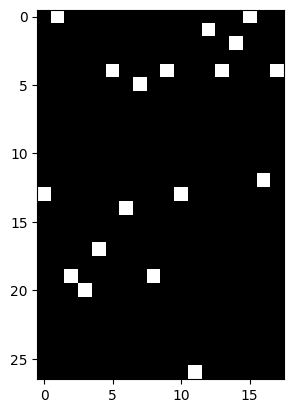

In [4]:
# Generate a random integer between 1 and 45000
random_integer = random.randint(1, 45000)

# Display an image from the training dataset at the index of the random integer
plt.imshow(train_x[random_integer, 0, :, :], cmap='gray')

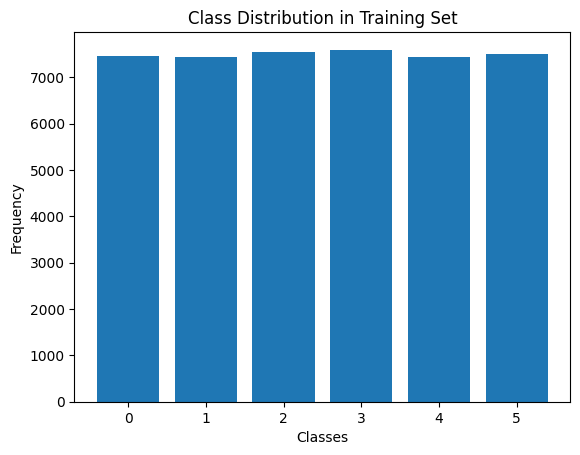

In [5]:
# Calculate the unique classes and their counts in train_y
unique, counts = np.unique(train_y, return_counts=True)

# Create a bar chart to display the frequency of each class
plt.bar(unique, counts)

# Add a title to the chart
plt.title('Class Distribution in Training Set')

# Label the x-axis with 'Classes'
plt.xlabel('Classes')

# Label the y-axis with 'Frequency'
plt.ylabel('Frequency')

# Display the plot
plt.show()

- As we can see the data is given in numpy array and the classes are well distributed

## Gutenberg Dataset 1 Preprocessing (NumPy array to Dataframe)

In [6]:
# Function to decode a single image into its textual representation
def decode_image(encoded_image):
    '''The decode_image function takes an image encoded as an array and decodes it into a string by mapping each encoded character back to a human-readable character ('A'-'Z' and space). '''
    # Create a mapping of numeric indices to characters: A-Z and space
    char_map = {i: chr(65 + i) for i in range(26)}
    char_map[26] = ' '  # Space character mapping
    
    decoded_string = []  # Initialize a list to hold the decoded characters
    for i in range(18):  # Loop over each of the 18 character positions in the image
        # Find the index with the highest value in the i-th column, which indicates the encoded character
        char_index = np.argmax(encoded_image[0, :, i])
        # Map the index to a character using the char_map and append to the list
        decoded_string.append(char_map[char_index])
    
    # Join all characters in the list to form the decoded string and return it
    return ''.join(decoded_string)

# Decode all images in the training set using a list comprehension
decoded_texts = [decode_image(img) for img in train_x]

# Print out the first 10 decoded strings to check the decoding results
for text in decoded_texts[:10]:
    print(text)

ALONE SHE   FLED  
HER   OLD   PLACE 
HAPPY ARE   THE   
ILY   SHE   ADDED 
POWER WHICH DOES  
THEY  ARE   UNCLE 
MUST  RECKONTHE   
LAWS  ABOUT GODS  
YOU   SHOW  HIM   
AND   TSZ   CHAN  


In [7]:
train_df = pd.DataFrame({
    'Text': decoded_texts,  # Column for the decoded texts
    'Label': train_y  # Column for the labels
})

# Define a mapping from numerical labels to author names
label_map = {
    0: 'aquinas',
    1: 'confucius',
    2: 'hawthorne',
    3: 'plato',
    4: 'shakespeare',
    5: 'tolstoy'
}
# Apply the mapping to the 'Label' column to replace numerical labels with author names
train_df['Label'] = train_df['Label'].map(label_map)

# Save the DataFrame with decoded texts and author labels to a CSV file
# df.to_csv('../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/training_data_with_labels.csv', index=False)

In [8]:
train_df

,Text,Label
0,ALONE SHE FLED,hawthorne
1,HER OLD PLACE,hawthorne
2,HAPPY ARE THE,plato
3,ILY SHE ADDED,tolstoy
4,POWER WHICH DOES,aquinas
...,...,...
44995,LESS ANGRY SHALL,plato
44996,FILL THEIR CUPS,confucius
44997,MET FOR NEARLY,tolstoy
44998,HAVE CUT DOWN,confucius


In [9]:
# Read the CSV file into a pandas DataFrame
glutenburg_train = pd.read_csv("../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/training_data_with_labels.csv")

# Display the first five rows of the DataFrame to verify its contents
glutenburg_train.head()

,Text,Label
0,ALONE SHE FLED,hawthorne
1,HER OLD PLACE,hawthorne
2,HAPPY ARE THE,plato
3,ILY SHE ADDED,tolstoy
4,POWER WHICH DOES,aquinas


In [10]:
# Decode the encoded images into text for the test dataset
decoded_texts = [decode_image(img) for img in test_x]

# Construct a DataFrame with the decoded texts and corresponding labels
test_df = pd.DataFrame({
    'Text': decoded_texts,  # The decoded texts
    'Label': test_y  # The corresponding labels
})

# Define a mapping from numerical labels to author names
label_map = {
    0: 'aquinas',
    1: 'confucius',
    2: 'hawthorne',
    3: 'plato',
    4: 'shakespeare',
    5: 'tolstoy'
}

# Replace numerical labels in the DataFrame with author names using the map
test_df['Label'] = test_df['Label'].map(label_map)

# Save the DataFrame with decoded texts and author labels to a CSV file for further analysis
# test_df.to_csv('../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/testing_data_with_labels.csv', index=False)

In [11]:
test_df

,Text,Label
0,AND RANK WOULD,tolstoy
1,BEFOREALL BODIES,plato
2,WHOM THAT AGE,hawthorne
3,AND LIVE AFTER,plato
4,LITTLEFACE UPON,hawthorne
...,...,...
5995,NOR PAN WILL,confucius
5996,MAY FAIRLYTAKE,plato
5997,BALLETLEVIN ONLY,tolstoy
5998,THE FINAL PAS,tolstoy


In [12]:
glutenburg_test= pd.read_csv("../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/testing_data_with_labels.csv")
glutenburg_test.head()

,Text,Label
0,AND RANK WOULD,tolstoy
1,BEFOREALL BODIES,plato
2,WHOM THAT AGE,hawthorne
3,AND LIVE AFTER,plato
4,LITTLEFACE UPON,hawthorne


- In this step we have decoded the numpy arrays and converted it to a dataframe which allows us to do a detailed exploratory analysis.

## EDA of Gutenberg Dataset 1 (After Preprocessing)

In [13]:
# Define a function to compute and visualize character frequency by class
def char_freq(df):
    from collections import Counter  # Import Counter to easily count occurrences of elements

    # Initialize a dictionary to hold frequency data for each class
    frequency_by_class = {}

    # Iterate over each unique class (author) in the DataFrame
    for label in df['Label'].unique():
        # Combine all texts from the current class into a single string
        all_text_in_class = ' '.join(df[df['Label'] == label]['Text'])
        
        # Use Counter to count the occurrences of each character in the combined texts
        frequency_by_class[label] = Counter(all_text_in_class)

    # Set up subplots for each class with a fixed figure size
    fig, axes = plt.subplots(nrows=len(frequency_by_class), ncols=1, figsize=(10, 8))

    # Ensure axes is a list for consistent iteration, even with a single class
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    # Plot the character frequencies for each class using a bar chart
    for ax, (label, freq) in zip(axes, frequency_by_class.items()):
        # Sort the frequencies in descending order for better visualization
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
        # Create a bar plot for the current class
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        # Set the title, labels, and adjust x-tick parameters for readability
        ax.set_title(f'Character Frequency for {label}')
        ax.set_xlabel('Characters')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)

    # Adjust layout for better spacing
    plt.tight_layout()
    # Display the plot
    plt.show()

def word_freq_w(df, top_x):
    # Define a list of common words to be excluded from the frequency analysis
    stopwords = [
    #pronouns
    'I', 'ME', 'YOU', 'HE', 'HIM', 'SHE', 'HER', 'IT', 'WE', 'US', 'THEY', 'THEM',
    'MY', 'MINE', 'YOUR', 'YOURS', 'HIS', 'HERS', 'ITS', 'OUR', 'OURS', 'THEIR', 'THEIRS',
    'MYSELF', 'YOURSELF', 'HIMSELF', 'HERSELF', 'ITSELF', 'OURSELVES', 'YOURSELVES', 'THEMSELVES',
    'THIS', 'THAT', 'THESE', 'THOSE',
    'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEING', 'BEEN', 'HAVE', 'HAS', 'HAD', 'DO', 'DOES', 'DID',
    'WILL', 'WOULD', 'SHALL', 'SHOULD', 'CAN', 'COULD', 'MAY', 'MIGHT', 'MUST',
    'WHAT', 'WHO', 'WHOM', 'WHOSE', 'WHICH', 'WHY', 'WHERE', 'WHEN', 'HOW',
    #conjunctions
    'AND', 'BUT', 'OR', 'NOR', 'FOR', 'YET', 'SO',
    #prepositions
    'AT', 'IN', 'ON', 'OF', 'TO', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 
    'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'FROM', 'UP', 'DOWN', 'OUT', 'OFF', 'OVER', 'UNDER', 
    'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW',
    'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 
    'NO', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'S', 'T', 'CAN', 'WILL', 'JUST', 'DON', 
    'SHOULD', 'NOW', 'D', 'LL', 'M', 'O', 'RE', 'VE', 'Y', 'AIN', 'AREN', 'COULDN', 'DIDN', 'DOESN', 'HADN', 
    'HASN', 'HAVEN', 'ISN', 'MA', 'MIGHTN', 'MUSTN', 'NEEDN', 'SHAN', 'SHOULDN', 'WASN', 'WEREN', 'WON', 'WOULDN',
    #articles
    'A', 'AN', 'THE'
    ]

     # Initialize a dictionary to hold word frequency data by class
    frequency_by_class_words = {}

    # Calculate raw word frequencies for each class
    for label in df['Label'].unique():
        # Concatenate all texts of the current class into a single string and split into words
        texts_in_class = ' '.join(df[df['Label'] == label]['Text']).split()
        # Use Counter to tally word occurrences in the current class
        frequency_by_class_words[label] = Counter(texts_in_class)

    # Initialize another dictionary for frequencies after removing common words
    frequency_by_class_filtered = {}

    # Re-calculate word frequencies without the common words
    for label, freq in frequency_by_class_words.items():
        # Create a Counter excluding words in the stopwords list
        filtered_freq = Counter({word: count for word, count in freq.items() if word not in stopwords})
        frequency_by_class_filtered[label] = filtered_freq

    # Prepare subplots for visualizing word frequencies in each class
    fig, axes = plt.subplots(nrows=len(frequency_by_class_filtered), ncols=1, figsize=(10, 8), constrained_layout=True)

    # Ensure axes is iterable
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    # Plot the top X most frequent words after filtering, for each class
    for ax, (label, freq) in zip(axes, frequency_by_class_filtered.items()):
        # Sort words by frequency and select the top X words
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True)[:top_x])
        # Generate a bar plot of word frequencies
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        ax.set_title(f'Top {top_x} Word Frequencies for {label}')
        ax.set_xlabel('Words')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)

    # Show the plots
    plt.show()

def seq_freq(df, top_x):
    # Function to generate 3-word sequences from text
    def get_three_word_sequences(text):
        words = text.split()  # Split the text into words
        # Create and return a list of 3-word sequences
        return [' '.join(words[i:i+3]) for i in range(len(words) - 2)]

    # Dictionary to store frequency of sequences by class
    sequence_frequency_by_class = {}

    # Calculate frequencies of sequences for each class in the dataset
    for label in df['Label'].unique():
        sequences = []
        # Gather all sequences for texts under the current label
        for text in df[df['Label'] == label]['Text']:
            sequences.extend(get_three_word_sequences(text))
        # Count and store the frequency of each sequence for this class
        sequence_frequency_by_class[label] = Counter(sequences)

    # Setup for plotting frequency data
    fig, axes = plt.subplots(nrows=len(sequence_frequency_by_class), ncols=1, figsize=(14, 8), constrained_layout=True)
    if not isinstance(axes, np.ndarray):
        axes = [axes]  # Ensure axes is iterable even if it's a single subplot

    # Plot frequency of top x 3-word sequences for each class
    for ax, (label, freq) in zip(axes, sequence_frequency_by_class.items()):
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True)[:top_x])
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        ax.set_title(f'Top {top_x} Three-Word Sequences for {label}')
        ax.set_xlabel('Sequences')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=0)
    plt.show()

    # Analyze sequences that appear across multiple classes
    combined_sequences = [seq for seqs in sequence_frequency_by_class.values() for seq in seqs.keys()]
    overall_sequence_count = Counter(combined_sequences)
    repeated_sequences = {seq: count for seq, count in overall_sequence_count.items() if count > 1}
    print(repeated_sequences)  # Output repeated sequences


def avg_word_len(df):
    # Define a function to calculate the average word length in a given text
    def average_word_length(text):
        words = text.split()  # Split the text into words
        if not words:  # Check if the list of words is not empty
            return 0
        return sum(len(word) for word in words) / len(words)  # Calculate average length

    # Dictionary to store average word length for each author
    average_lengths_by_author = {}

    # Loop over each unique label/author in the DataFrame
    for label in df['Label'].unique():
        author_texts = df[df['Label'] == label]['Text']
        # Compute the average word length for each text and take the mean for this author
        average_length = np.mean([average_word_length(text) for text in author_texts])
        average_lengths_by_author[label] = average_length

    # Plotting the average word length per author
    plt.figure(figsize=(10, 5))
    plt.bar(average_lengths_by_author.keys(), average_lengths_by_author.values())
    plt.xlabel('Author')
    plt.ylabel('Average Word Length')
    plt.title('Average Word Length per Author')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.show()

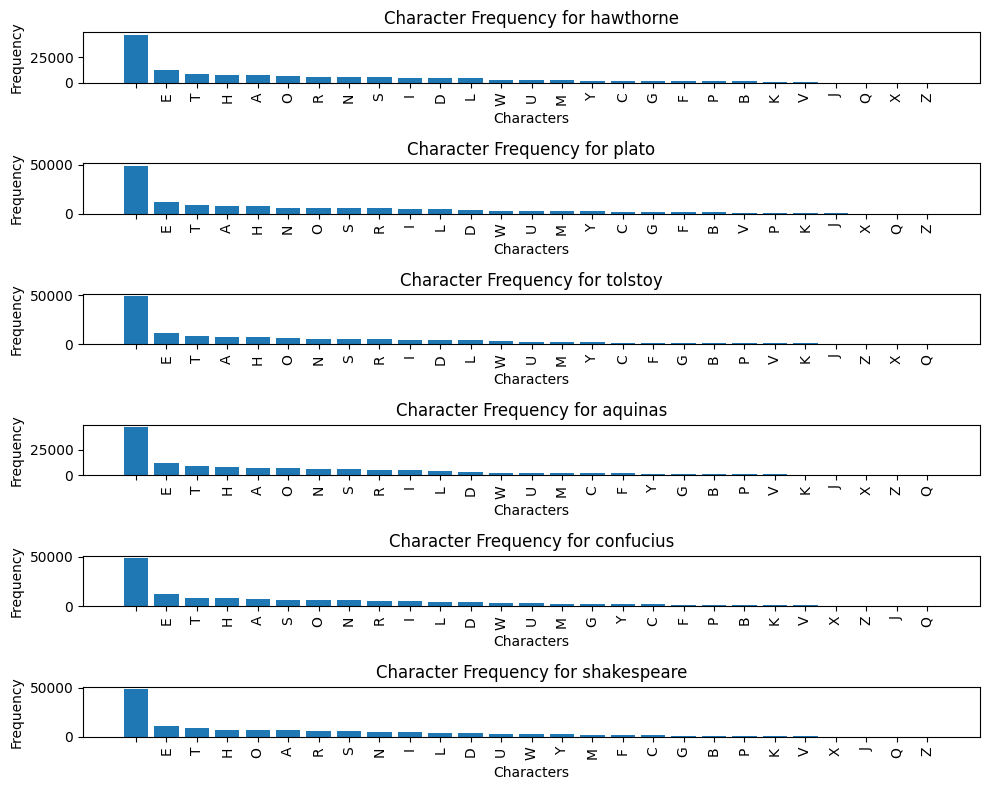

In [14]:
char_freq(glutenburg_train)

- Here we can see the character frequency of each writer

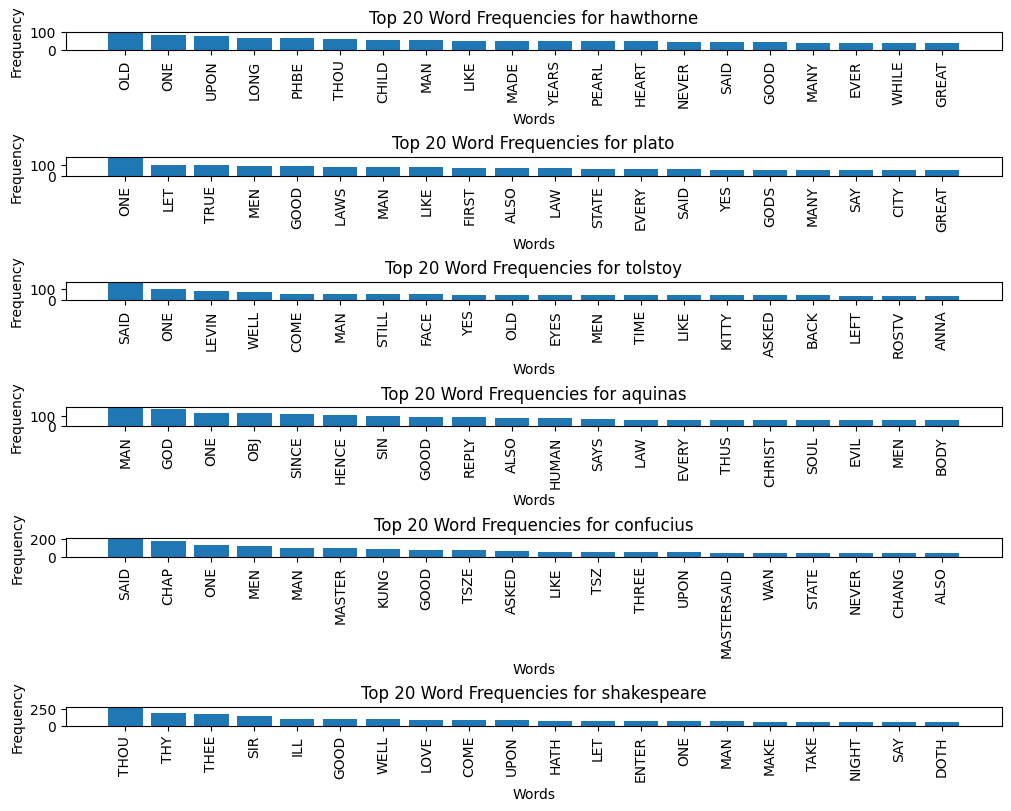

In [15]:
word_freq_w(glutenburg_train, 20)

- Here we can see the top 20 words for each writer. We can also see the most frequent word used by each writers.

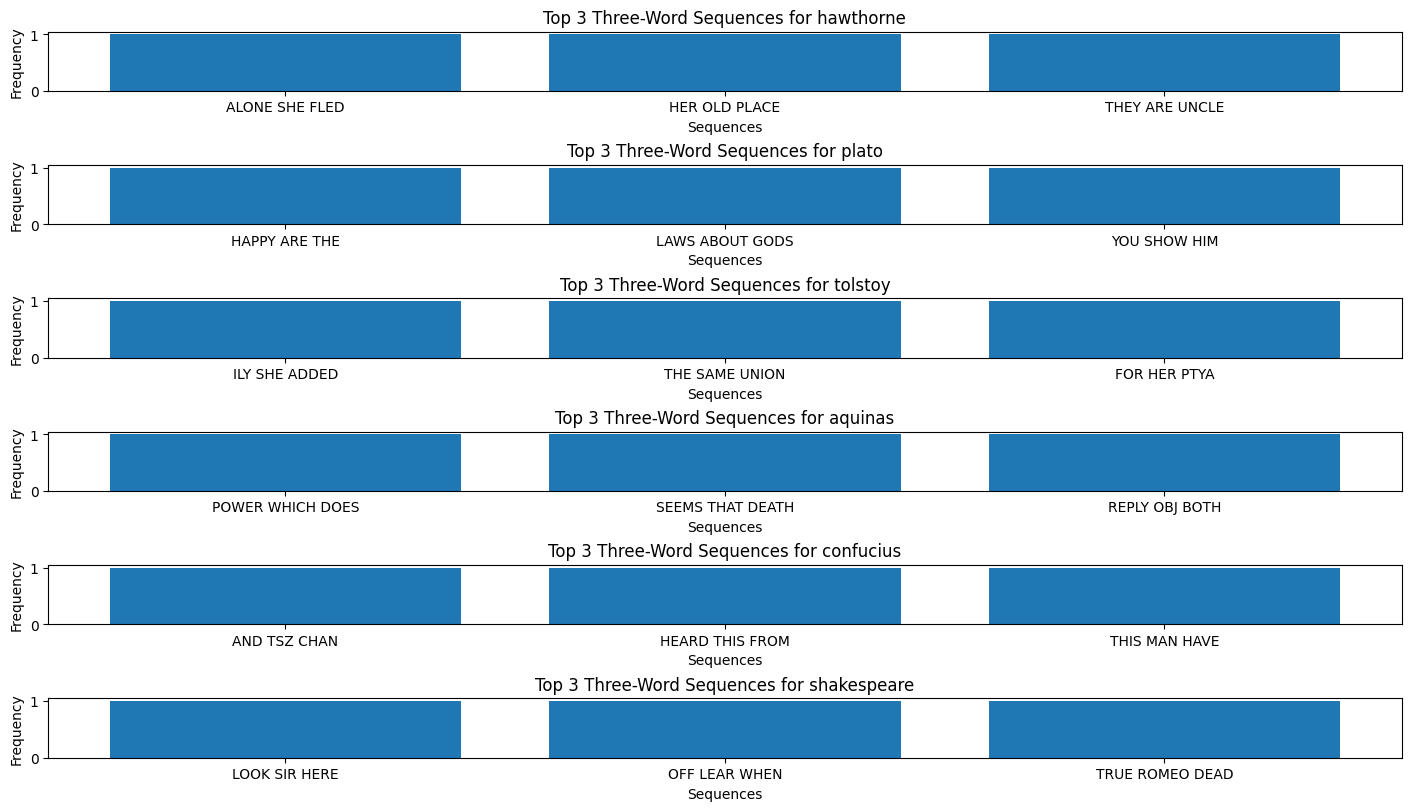

{}


In [16]:
seq_freq(glutenburg_train, 3)

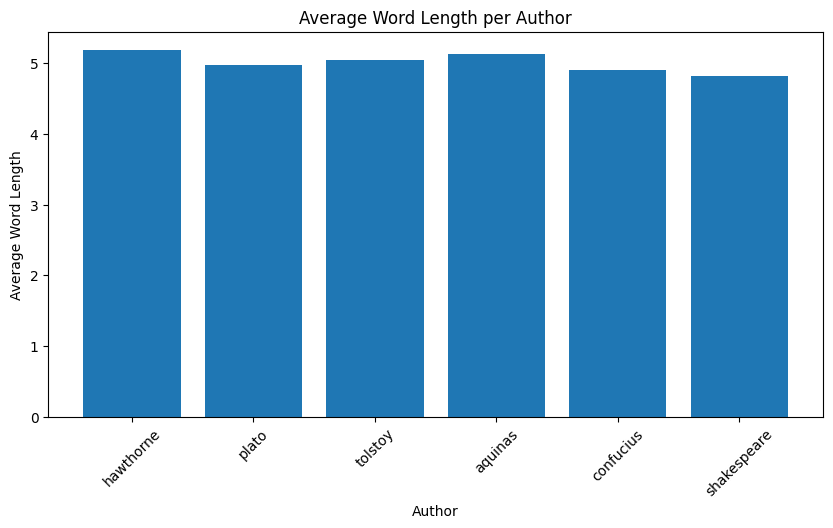

In [17]:
avg_word_len(glutenburg_train)

- hawthrone has the highest average word length.

## Creating Train Test Data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train_df["Text"],train_df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(36000, 53902) (9000, 53902) (36000,) (9000,)


## Model Building, Training and Evaluation

### Logistic Regression

In [20]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

KeyboardInterrupt: 

#### Making Prediction with Logistic Regression

In [20]:
test_senteces = x_test.to_list()
test_senteces[0]

'FINE  FELLOWTHERES'

In [21]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['plato']


### Support Vector Machine

In [22]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

s:\Anaconda\envs\ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.5161111111111111
              precision    recall  f1-score   support

     aquinas       0.54      0.56      0.55      1453
   confucius       0.58      0.50      0.54      1537
   hawthorne       0.50      0.47      0.49      1540
       plato       0.42      0.55      0.48      1511
 shakespeare       0.59      0.53      0.56      1498
     tolstoy       0.51      0.47      0.49      1461

    accuracy                           0.52      9000
   macro avg       0.52      0.52      0.52      9000
weighted avg       0.52      0.52      0.52      9000



#### Making Prediction with SVM

In [23]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['plato']


### Naive Bayes (Multinomial)

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.5098888888888888
              precision    recall  f1-score   support

     aquinas       0.55      0.58      0.57      1453
   confucius       0.53      0.48      0.50      1537
   hawthorne       0.53      0.43      0.47      1540
       plato       0.42      0.57      0.48      1511
 shakespeare       0.58      0.52      0.55      1498
     tolstoy       0.50      0.48      0.49      1461

    accuracy                           0.51      9000
   macro avg       0.52      0.51      0.51      9000
weighted avg       0.52      0.51      0.51      9000



#### Making Predictions with Naive Bayes

In [25]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['shakespeare']


### Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.38822222222222225
              precision    recall  f1-score   support

     aquinas       0.44      0.47      0.46      1453
   confucius       0.37      0.33      0.35      1537
   hawthorne       0.41      0.24      0.30      1540
       plato       0.35      0.48      0.40      1511
 shakespeare       0.37      0.47      0.42      1498
     tolstoy       0.42      0.34      0.38      1461

    accuracy                           0.39      9000
   macro avg       0.39      0.39      0.38      9000
weighted avg       0.39      0.39      0.38      9000



#### Making Predictions with Random Forest

In [27]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['shakespeare']


### Ensemble Classifier

In [28]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.5007777777777778
              precision    recall  f1-score   support

     aquinas       0.53      0.58      0.55      1453
   confucius       0.53      0.48      0.50      1537
   hawthorne       0.46      0.44      0.45      1540
       plato       0.44      0.54      0.48      1511
 shakespeare       0.56      0.51      0.53      1498
     tolstoy       0.51      0.47      0.49      1461

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



#### Making Predictions with Ensemble Classifier

In [29]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['plato']


### Compare between ML models

In [30]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],

})

In [31]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,Ensembled
Accuracy,51.088889,51.611111,50.988889,38.822222,50.077778
F1_score,51.155381,51.755910,51.065471,38.387959,50.129168
Recall,51.088889,51.611111,50.988889,38.822222,50.077778
Precision,51.088889,51.611111,50.988889,38.822222,50.077778


we compare the performance of five different machine learning models for the task of authorship attribution using uni-bi-gram (1,2) feature extraction. The models evaluated are Logistic Regression, SVM (Support Vector Machine), Naive Bayes, Random Forest, and an Ensemble model.

Observations:
- The SVM model performs the best among the evaluated models in terms of all four metrics (Accuracy, F1 Score, Recall, Precision), suggesting its effectiveness in handling the feature space created by uni-bi-gram for this specific task of authorship attribution.
- The Random Forest model shows significantly lower performance compared to other models, which might indicate overfitting or a lack of sufficient complexity to handle the text data effectively.
- The Ensemble model, despite combining multiple models, does not significantly outperform the single instance models like SVM or Logistic Regression, which could point towards the need for optimizing how the models are combined or choosing different base models for the ensemble.
- The overall performance across all models is relatively similar and moderate, suggesting that the task is challenging and might benefit from additional feature engineering, more sophisticated model tuning, or using more complex models such as deep learning.

## Loading Gutenberg Dataset 2

In [21]:
import os 

book_list = os.listdir("../dataset_02_personally_collected_data/data_before_processing")
book_list

['eda_class_balance_dataset_2.png',
 'william_shakespeare-macbeth.txt',
 'f_scott_fitzgerald-the_beautiful_and_damned.txt',
 'oscar_wilde-the_picture_of_dorian_gray.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_4.txt',
 'jane_austen-pride_and_prejudice.txt',
 'george_eliot-the_mill_on_the_floss.txt',
 'charles_dickens-great_expectations.txt',
 'charles_dickens-the_mystery_of_edwin_drood.txt',
 'mark_twain-adventures_of_huckleberry_finn.txt',
 'william_shakespeare-alls_well_that_ends_well.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_3.txt',
 'james_joyce-ulysses.txt',
 'charles_dickens-oliver_twist.txt',
 'jane_austen-emma.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_1.txt',
 'eda_word_length_dataset_2.png',
 'mark_twain-the_adventures_of_tom_sawyer_part_5.txt',
 'f_scott_fitzgerald-this_side_of_paradise.txt',
 'joseph_conrad-the_rover.txt',
 'oscar_wilde-an_ideal_husband.txt',
 'virginia_woolf-mrs_dalloway.txt',
 'virginia_woolf-night_and_day.txt',
 'oscar_wilde-

In [22]:

import os
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/quantigo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quantigo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/quantigo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/quantigo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/quantigo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
def extract_author(filename):
    """
    Extract the author's name from the filename.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    return filename.split('_')[0].replace('-', ' ')

def process_files(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            author = extract_author(filename)
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                text = file.read()
                sentences = sent_tokenize(text)
                if len(sentences) > 1000:
                    sampled_sentences = sentences[:1000]
                else:
                    sampled_sentences = sentences
                for sentence in sampled_sentences:
                    data.append({'Text': sentence, 'Label': author})
    return data

def create_dataframe(data):
    """
    Create a dataframe from the provided data list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
data = process_files(directory_path)
df = create_dataframe(data)
print(df.head())

                     Text    Label
0      ﻿ACT I\n\nSCENE I.  william
1          An open Place.  william
2  Thunder and Lightning.  william
3    Enter three Witches.  william
4            FIRST WITCH.  william


In [26]:
df=pd.read_csv("../dataset_02_personally_collected_data/data_after_processing/sentence_df.csv", engine='python', encoding='UTF-8')
df['Label'].value_counts()

Label
mark        2000
charles     1000
f            600
george       600
james        600
jane         600
joseph       600
oscar        600
virginia     600
william      600
Name: count, dtype: int64

In [27]:
df

,Text,Label
0,﻿Chapter I.,charles
1,"My father’s family name being Pirrip, and my C...",charles
2,"So, I called myself Pip, and came to be called...",charles
3,"I give Pirrip as my father’s family name, on t...",charles
4,"Joe Gargery, who married the blacksmith.",charles
...,...,...
7795,Word of denial!,william
7796,"Froth and scum, thou liest.",william
7797,SLENDER.,william
7798,[_Points at Nym_.],william


In [28]:
# Define a dictionary mapping short names to full names
name_map = {
    'charles': 'Charles Dickens',
    'mark': 'Mark Twain',
    'f': 'F. Scott Fitzgerald',
    'george': 'George Eliot',  # Corrected spelling from "Eilot" to "Eliot"
    'james': 'James Joyce',
    'jane': 'Jane Austen',
    'joseph': 'Joseph Conrad',
    'oscar': 'Oscar Wilde',
    'virginia': 'Virginia Woolf',
    'william': 'William Shakespeare'
}

In [29]:
df['Label'] = df['Label'].map(name_map)

In [30]:
df

,Text,Label
0,﻿Chapter I.,Charles Dickens
1,"My father’s family name being Pirrip, and my C...",Charles Dickens
2,"So, I called myself Pip, and came to be called...",Charles Dickens
3,"I give Pirrip as my father’s family name, on t...",Charles Dickens
4,"Joe Gargery, who married the blacksmith.",Charles Dickens
...,...,...
7795,Word of denial!,William Shakespeare
7796,"Froth and scum, thou liest.",William Shakespeare
7797,SLENDER.,William Shakespeare
7798,[_Points at Nym_.],William Shakespeare


## EDA of Gutenburg Dataset 2 (Before Preprocessing)

<Axes: xlabel='Label', ylabel='count'>

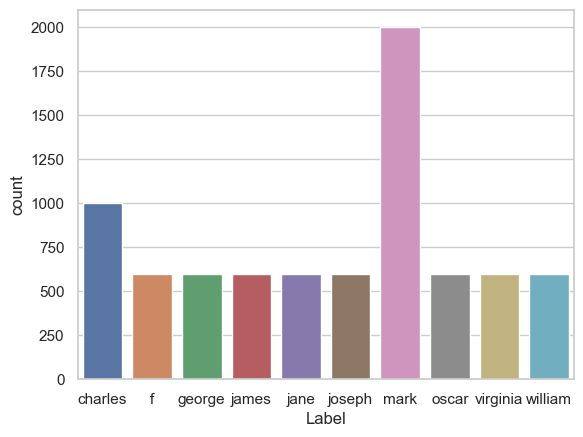

In [44]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.countplot(x=df["Label"])

Observations:
- Imbalance in Dataset: The dataset exhibits a significant class imbalance. 'Virginia' has the highest number of samples, approximately 2000, which is considerably more than any other author. 'Charles', on the other hand, has around 750 samples, which is the smallest count among the authors. The other authors (George, James, Jane, Joseph, Mark, Oscar, William) have sample counts roughly ranging between 500 to 750.
- Potential Implications for Modeling:
  - Model Bias: The imbalance might lead to models being biased towards the author with the most samples ('Virginia') as they would have more examples to learn from compared to other authors. This could potentially skew the model's predictions towards 'Virginia' when uncertain.
  - Overfitting Risks: Models might overfit to the author with the most data, as the learning process could focus too much on the patterns specific to 'Virginia’s' writing style.
  - Under-representation: Authors with fewer samples might be underrepresented in the model, leading to poorer performance when identifying their texts.

s:\Anaconda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


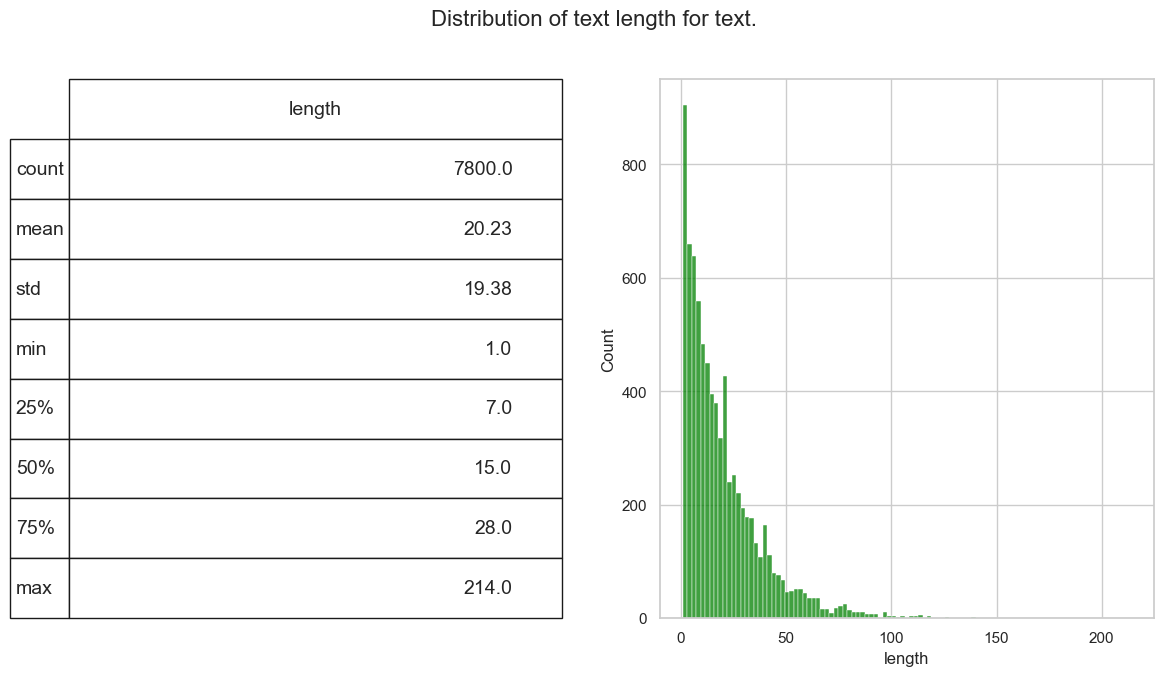

In [45]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

- Here the figure represents the distribution of text lengths within a dataset. The histogram shows that the distribution of text lengths is heavily right-skewed, with a large number of texts having relatively few words and only a few.

### Preprocessing Gutenberg Dataset 2

In [71]:
df['Label'].value_counts()

Label
charles     600
f           600
george      600
james       600
jane        600
joseph      600
mark        600
oscar       600
virginia    600
william     600
Name: count, dtype: int64

In [72]:
# Determine the minimum count to downsample to
min_count = df['Label'].value_counts().min()

# Downsample each group
df = df.groupby('Label').sample(n=min_count, random_state=42)
df["Label"].value_counts()

Label
charles     600
f           600
george      600
james       600
jane        600
joseph      600
mark        600
oscar       600
virginia    600
william     600
Name: count, dtype: int64

In [73]:
## data cleaning
df['Text']=df['Text'].fillna("") 
df.isna().sum()

Text            0
Label           0
length          0
lower_case      0
alphabatic      0
without-link    0
Special_word    0
stop_words      0
short_word      0
string          0
dtype: int64

In [49]:
import nltk
from nltk.corpus import stopwords, reuters, brown, gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from textblob import Word 
from wordcloud import WordCloud

In [50]:
df['lower_case'] = df['Text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ') 
 
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

### EDA Gutenburg Dataset 2 (After Preprocessing)

<Axes: xlabel='Label', ylabel='count'>

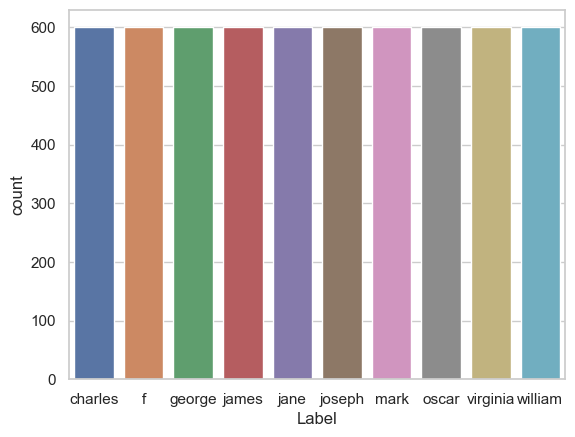

In [51]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Label"])

- Post preprocessing, it is evident that each author is represented by an approximately equal number of samples. This contrasts with earlier distributions where some authors, such as 'Virginia', were significantly overrepresented. This balanced distribution is essential for training unbiased machine learning models in authorship attribution tasks.

s:\Anaconda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


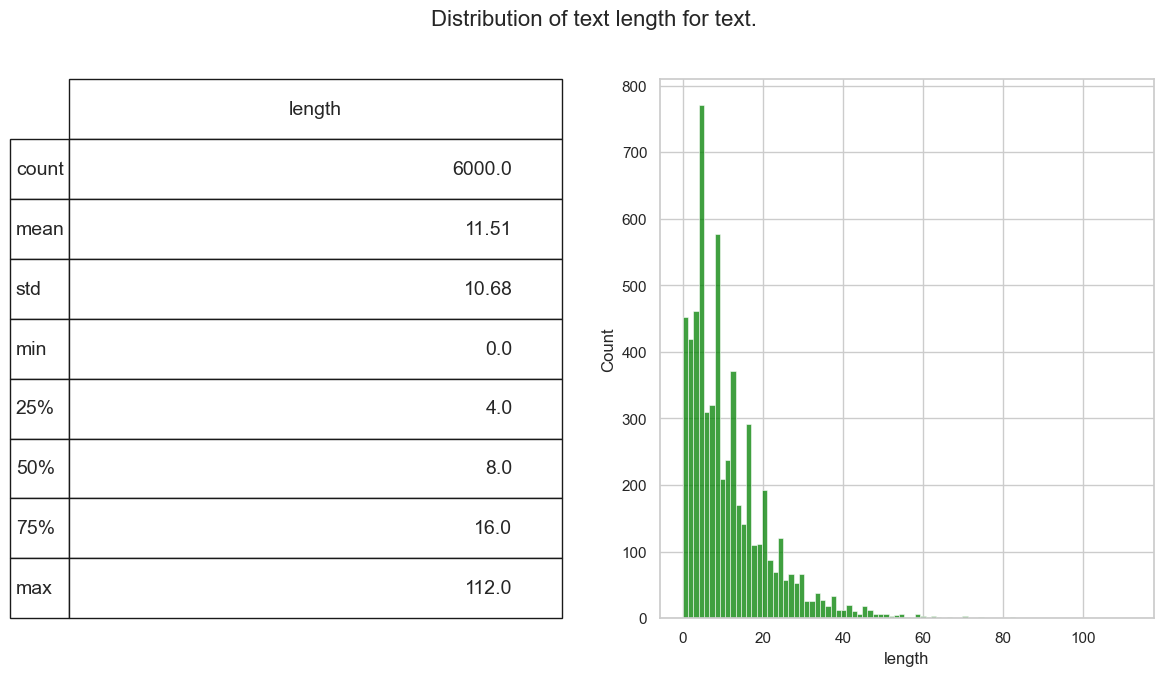

In [52]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

Observations:
- Short Text Bias: The predominance of short texts could affect the model's ability to learn more complex patterns that would be apparent in longer texts, potentially limiting its effectiveness in accurately attributing authorship, especially for authors known for longer passages.
- Noise from Empty Texts: The presence of texts with a length of 0 could introduce noise into the dataset, potentially affecting model training unless handled specifically, such as by removal or further preprocessing.
- Feature Representation Challenges: Shorter texts provide fewer words and possibly less contextual information for feature extraction techniques, which could challenge the robustness and discriminatory power of the authorship attribution models.

## Train Test Split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(4800, 53334) (1200, 53334) (4800,) (1200,)


### Model Building, Training, Evaluation and Comparison (for Gutenberg Dataset 2)

### Logistic Regression

#### Model Building and Training

In [58]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.6108333333333333
              precision    recall  f1-score   support

     charles       0.69      0.60      0.64       143
           f       0.73      0.49      0.59       125
      george       0.68      0.68      0.68       130
       james       0.61      0.52      0.56       115
        jane       0.56      0.80      0.66       100
      joseph       0.39      0.63      0.48       112
        mark       0.46      0.47      0.47       118
       oscar       0.71      0.59      0.65       125
    virginia       0.57      0.61      0.59       112
     william       0.93      0.73      0.82       120

    accuracy                           0.61      1200
   macro avg       0.63      0.61      0.61      1200
weighted avg       0.64      0.61      0.62      1200



#### Making Predictions

In [59]:
test_senteces = x_test.to_list()
test_senteces[0]

'ay let hear he said adjusting himself chair complacency person thought worthy important communication'

In [60]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['oscar']


### Support Vector Machine

#### Model Building and Training

In [61]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.6408333333333334
              precision    recall  f1-score   support

     charles       0.69      0.61      0.65       143
           f       0.68      0.51      0.58       125
      george       0.74      0.72      0.73       130
       james       0.67      0.56      0.61       115
        jane       0.58      0.84      0.69       100
      joseph       0.51      0.61      0.56       112
        mark       0.50      0.49      0.50       118
       oscar       0.59      0.66      0.63       125
    virginia       0.61      0.65      0.63       112
     william       0.90      0.79      0.84       120

    accuracy                           0.64      1200
   macro avg       0.65      0.64      0.64      1200
weighted avg       0.65      0.64      0.64      1200



s:\Anaconda\envs\ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


#### Making Predictions

In [62]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['jane']


### Naive Bayes (Multinomial)

#### Model Building and training

In [63]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.5883333333333334
              precision    recall  f1-score   support

     charles       0.74      0.48      0.58       143
           f       0.84      0.39      0.54       125
      george       0.61      0.74      0.67       130
       james       0.69      0.50      0.58       115
        jane       0.34      0.92      0.49       100
      joseph       0.54      0.59      0.56       112
        mark       0.52      0.45      0.48       118
       oscar       0.75      0.54      0.63       125
    virginia       0.54      0.64      0.59       112
     william       0.94      0.71      0.81       120

    accuracy                           0.59      1200
   macro avg       0.65      0.60      0.59      1200
weighted avg       0.66      0.59      0.60      1200



#### Making Predictions

In [64]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['jane']


### Random Forest Classifier

#### Model Building and Training

In [65]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.5208333333333334
              precision    recall  f1-score   support

     charles       0.79      0.45      0.58       143
           f       0.78      0.37      0.50       125
      george       0.94      0.55      0.70       130
       james       0.38      0.37      0.38       115
        jane       0.54      0.60      0.57       100
      joseph       0.40      0.48      0.44       112
        mark       0.41      0.40      0.41       118
       oscar       0.32      0.80      0.45       125
    virginia       0.64      0.54      0.59       112
     william       0.79      0.64      0.71       120

    accuracy                           0.52      1200
   macro avg       0.60      0.52      0.53      1200
weighted avg       0.61      0.52      0.53      1200



#### Making Predictions

In [66]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['mark']


### Ensemble Classifier

#### Model Building and Training

In [67]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.605
              precision    recall  f1-score   support

     charles       0.67      0.58      0.62       143
           f       0.72      0.49      0.58       125
      george       0.68      0.69      0.68       130
       james       0.60      0.50      0.55       115
        jane       0.56      0.76      0.64       100
      joseph       0.41      0.63      0.50       112
        mark       0.45      0.44      0.45       118
       oscar       0.64      0.59      0.61       125
    virginia       0.58      0.61      0.59       112
     william       0.89      0.78      0.83       120

    accuracy                           0.60      1200
   macro avg       0.62      0.61      0.61      1200
weighted avg       0.62      0.60      0.61      1200



#### Making Predictions

In [68]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['joseph']


### Comparison Between ML Models (Gutenberg Dataset 2)

In [69]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],

})

In [70]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,Ensembled
Accuracy,61.083333,64.083333,58.833333,52.083333,60.500000
F1_score,61.395732,64.030234,59.274771,53.101662,60.621236
Recall,61.083333,64.083333,58.833333,52.083333,60.500000
Precision,61.083333,64.083333,58.833333,52.083333,60.500000


**Summary:**
SVM is the most effective model, showing the highest scores across all evaluated metrics. This insight can guide further refinement and focus on SVM for potential deployment in similar tasks. The results also underline the importance of model selection based on specific features and data characteristics, as different models exhibit distinctly different performances.

In [76]:
joblib.dump(svc, 'Text_SVM.pkl')

['Text_SVM.pkl']